In [1]:
# importing liburaries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from imblearn.combine import SMOTEENN 

In [2]:
#reading csv file to dataframe 
df=pd.read_csv(r"C:\Users\M RAJESH\Desktop\Ekeeda DS\Country-data.csv")
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
#as exports, imports,health are in percentage of gdp so converting them to original form 
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [4]:
#cheking info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#checking null value count in each column
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#5 point summery of numerical columns 
df.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [7]:
#checking no.of unique counties in country column
df['country'].nunique()

167

In [8]:
#encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(df['country'] )


In [9]:
#coping the dataframe into another variable for further use
df_copy=df.copy()

In [10]:
#dropping the country column as it was object data type and 167 unique countries
df.drop('country',1,inplace=True)

# visualization

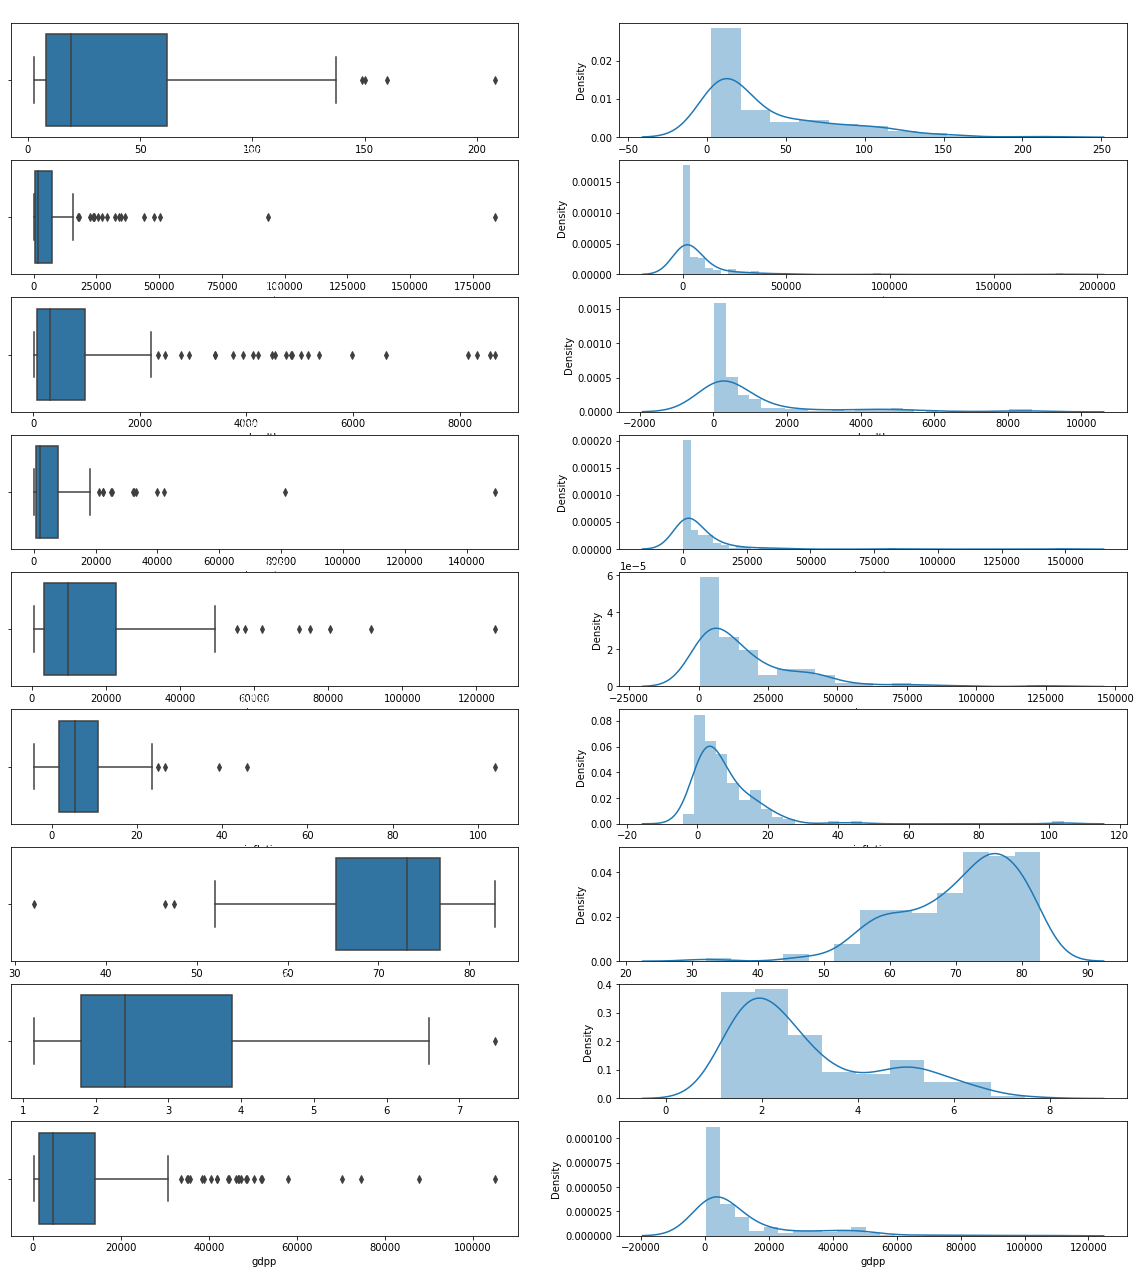

In [11]:
#boxplot and distplot for checking outliers and distribution of data in each column
j=1
plt.figure(figsize=(20,40))
for i in df.columns:
    plt.subplot(16,2,j)
    sns.boxplot(df[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.distplot(df[i])
    j=j+1

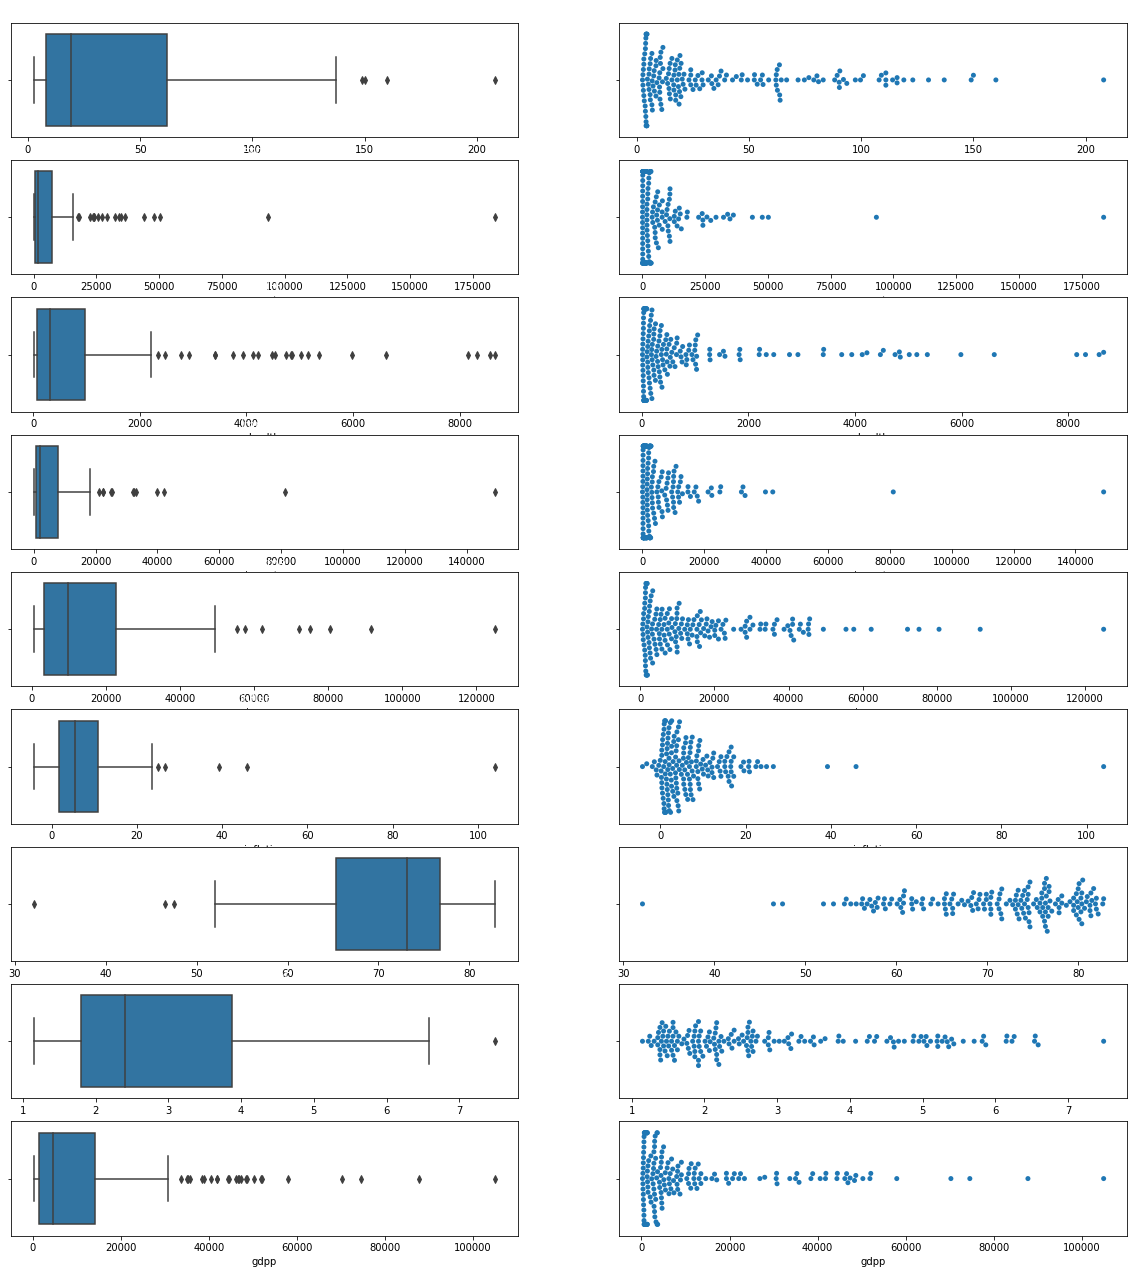

In [12]:
#along with boxplot plotting swarmplot to know no.of outlier points 
j=1
plt.figure(figsize=(20,40))
for i in df.columns:
    plt.subplot(16,2,j)
    sns.boxplot(df[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.swarmplot(df[i])
    j=j+1

#### As there are only few points are present in each column as outliers, so it is better to replace them with mean or median or mode

In [13]:
df.skew()

child_mort    1.450774
exports       6.720171
health        2.526029
imports       6.618500
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

In [14]:
#removing outliers by replacing them eith mean 
for i in df.columns:
    q1 , q3 =df[i].quantile([0.25,0.75]) 
    iqr = q3-q1
    lf , uf = q1-1.5*iqr , q3+1.5*iqr
    df[i] = np.where(df[i] <lf ,df[i].mean(),df[i])
    df[i] = np.where(df[i] >uf ,df[i].mean(),df[i])

In [15]:
df.skew()

child_mort    1.167945
exports       1.139095
health        1.103326
imports       1.391470
income        1.038943
inflation     0.894936
life_expec   -0.547204
total_fer     0.928968
gdpp          1.242576
dtype: float64

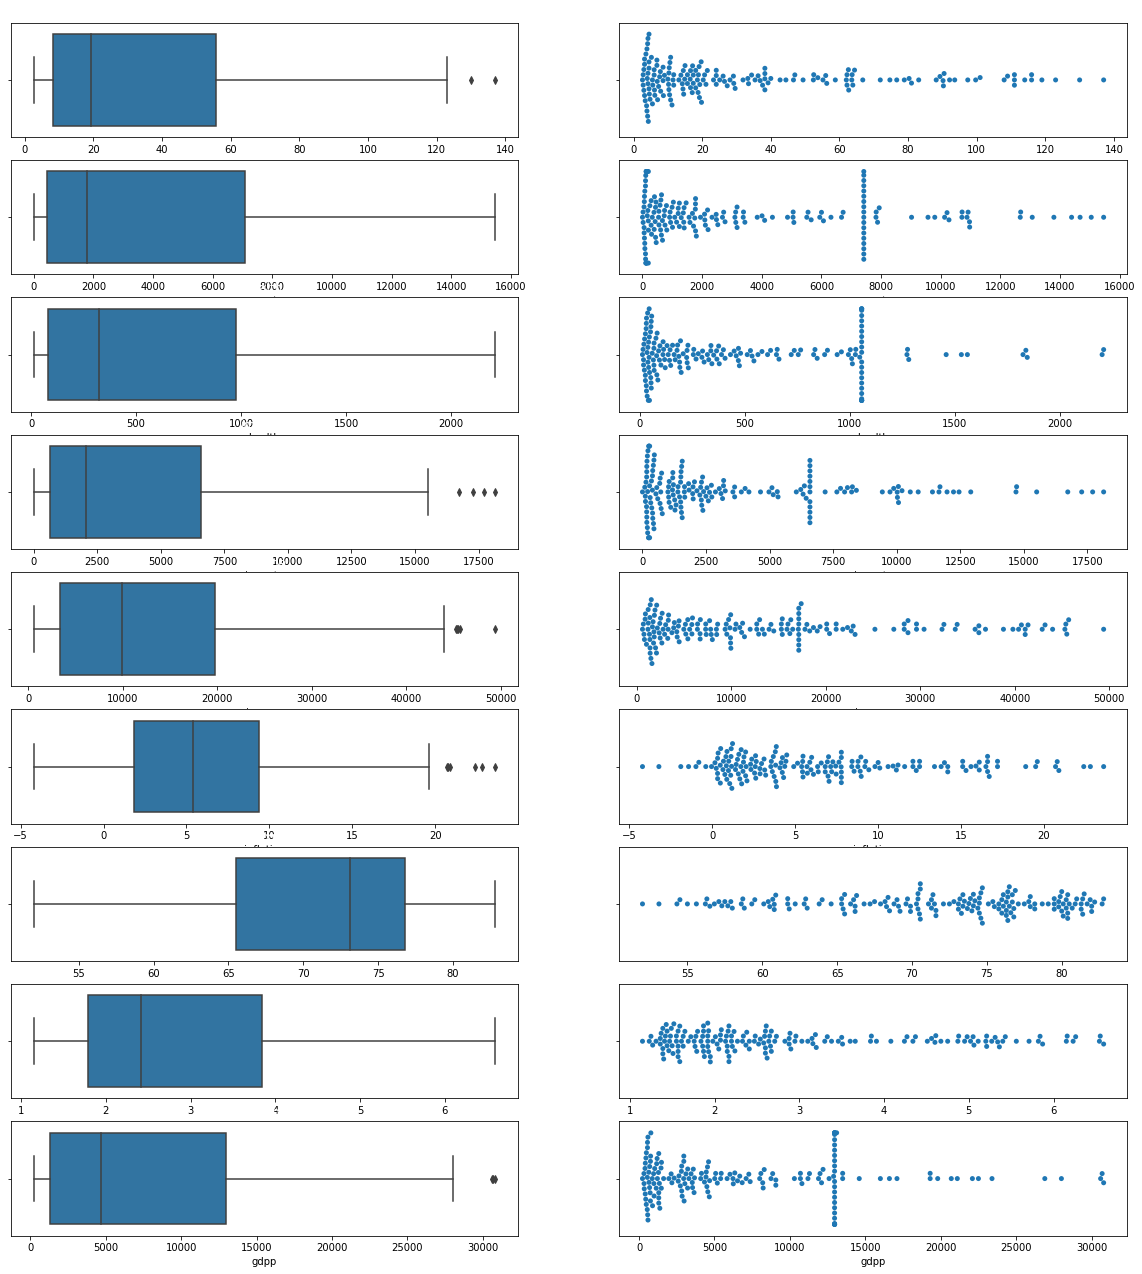

In [16]:
#checking whether the ouliers are teated or not?
j=1
plt.figure(figsize=(20,40))
for i in df.columns:
    plt.subplot(16,2,j)
    sns.boxplot(df[i])
    plt.title(i,color='white')
    j=j+1
    plt.subplot(16,2,j)
    sns.swarmplot(df[i])
    j=j+1

In [17]:
# importing necessary libraries for model building
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [18]:
# standard scaling
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

df = scaler.fit_transform(df)

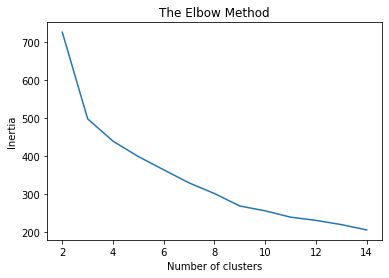

In [19]:
# finding no.of clusters to take as per inertia
cs = []
for i in range(2,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 600, n_init = 10)
    
    kmeans.fit(df)
    
    cs.append(kmeans.inertia_)

# plot the 
plt.plot(range(2,15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

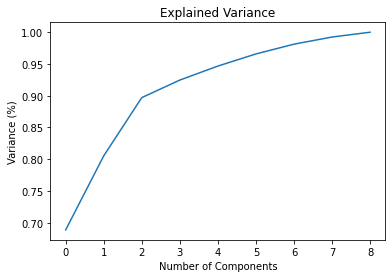

In [20]:
# finding no.of principal components with respect to the varience
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [21]:
# applying PCA 
pca = PCA(n_components=3)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1','principal component 2','principal component 3'])

In [22]:
principal_Df.head()

principal component 1  principal component 2  principal component 3
0              -3.531169               1.338167              -0.315297
1              -0.106481              -1.614102              -0.209965
2              -0.779823              -0.790575               1.601960
3              -3.490239               2.389875               1.763175
4               1.818064              -0.239527              -0.519753

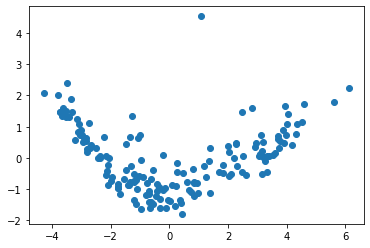

In [23]:
plt.scatter(principal_Df['principal component 1'],principal_Df['principal component 2'])

In [24]:
# finding silhouette score for different clusters values
for i in range(2,10):
    k_means = KMeans(n_clusters=i, max_iter = 300, init = 'k-means++',random_state = 0,n_init = 10)
    cluster_labels=k_means.fit_predict(principal_Df)
    print(silhouette_score(principal_Df, cluster_labels))

0.49151563413683386
0.4523045687796382
0.36418007407552033
0.36951242514856275
0.33305771186163985
0.3526874298480886
0.35597907645323973
0.36533891313915906


For n_clusters = 2 The average silhouette_score is : 0.49151563413683386
For n_clusters = 3 The average silhouette_score is : 0.4523045687796382
For n_clusters = 4 The average silhouette_score is : 0.3661167171483696
For n_clusters = 6 The average silhouette_score is : 0.32547533409864243
For n_clusters = 8 The average silhouette_score is : 0.3603918469450055
For n_clusters = 10 The average silhouette_score is : 0.3423113217517925
For n_clusters = 14 The average silhouette_score is : 0.3216524087596158
For n_clusters = 17 The average silhouette_score is : 0.3321096817074922
For n_clusters = 19 The average silhouette_score is : 0.3405701437336835
For n_clusters = 22 The average silhouette_score is : 0.33869415898826233
For n_clusters = 24 The average silhouette_score is : 0.3469983497144463
For n_clusters = 26 The average silhouette_score is : 0.320752684662463
For n_clusters = 27 The average silhouette_score is : 0.34165030762715376


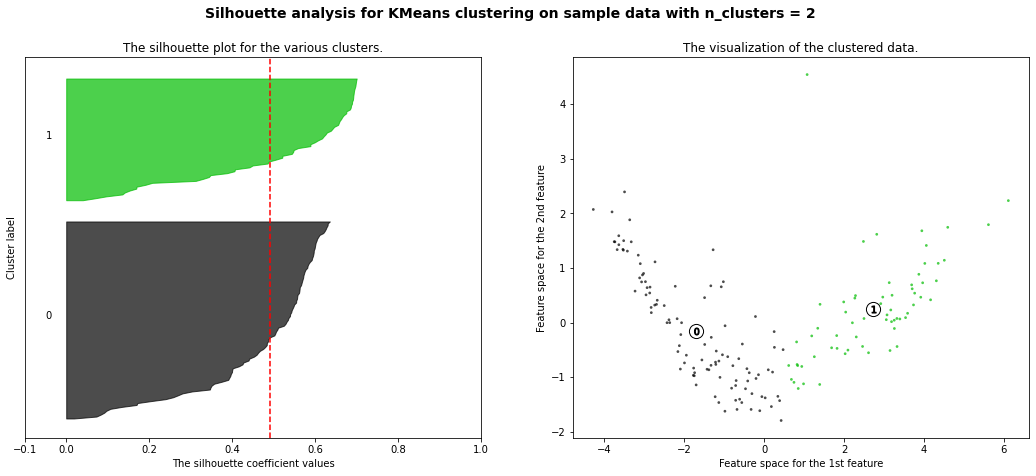

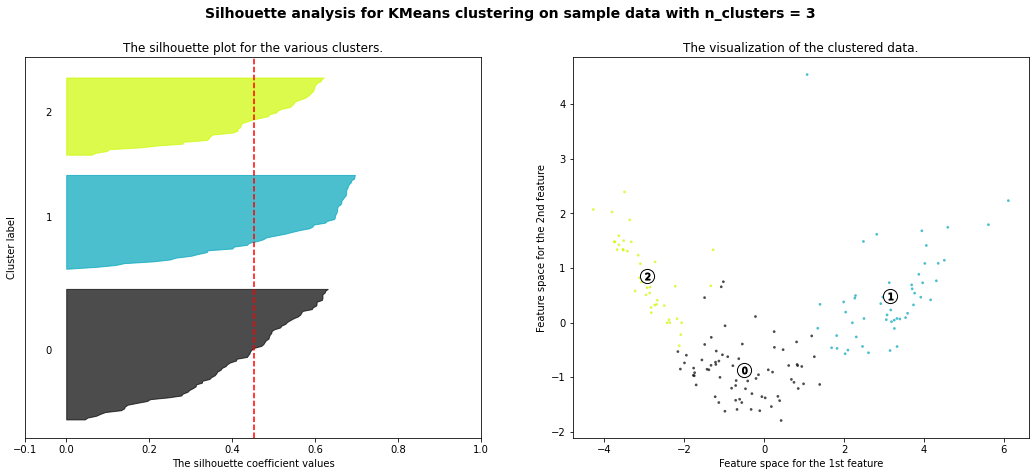

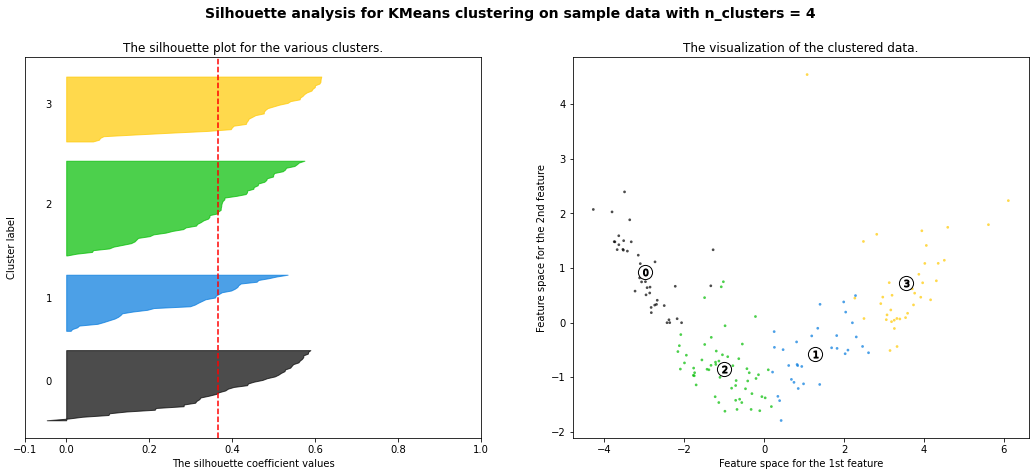

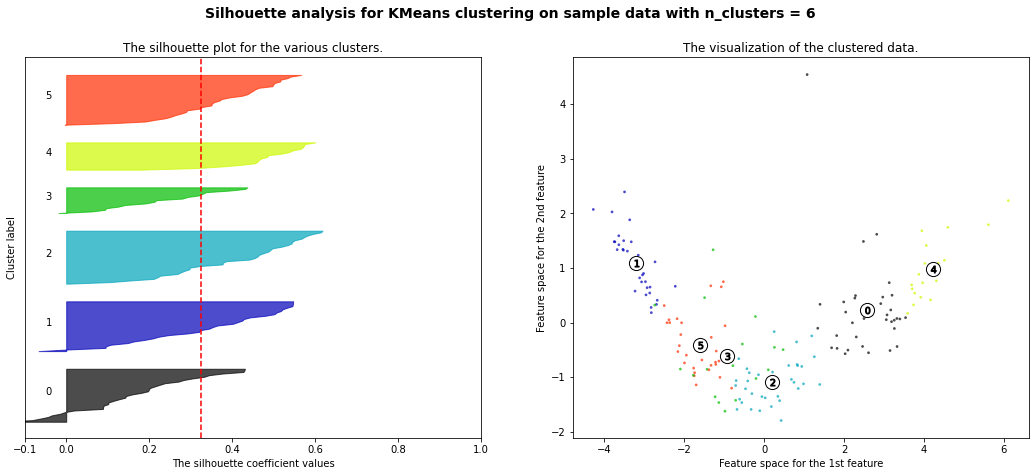

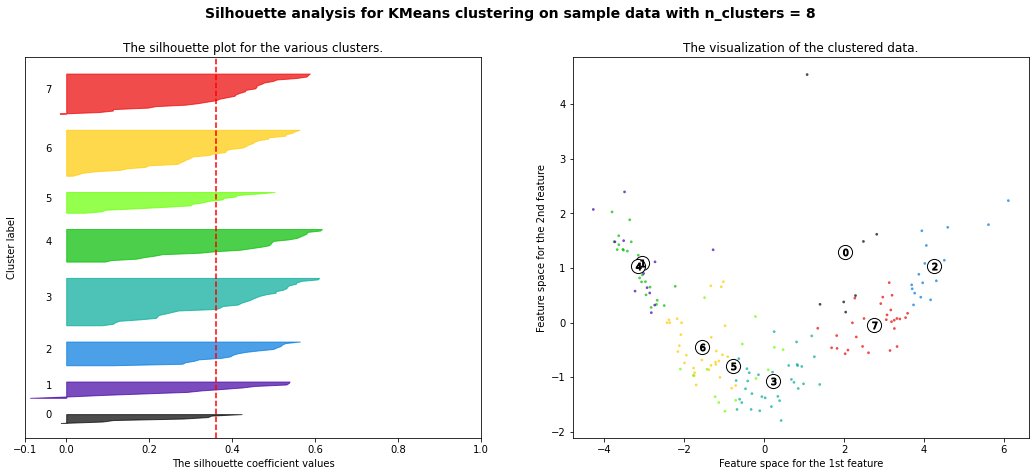

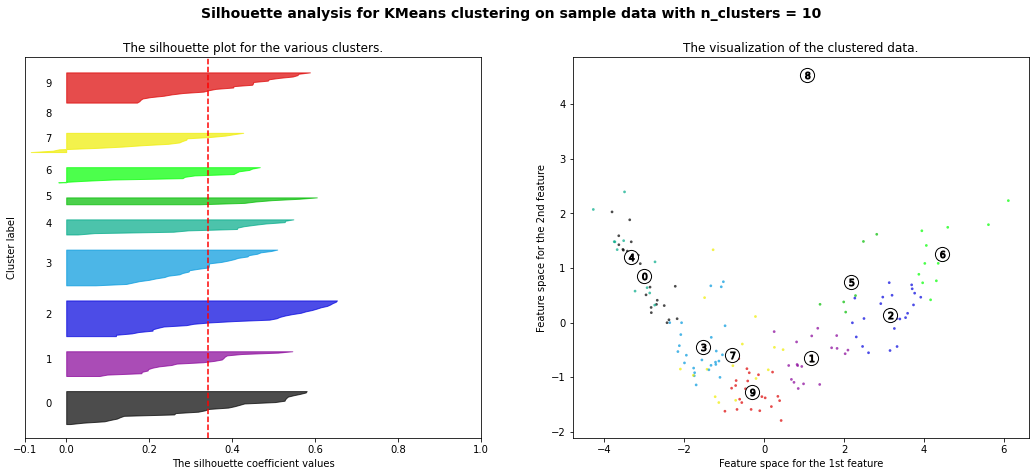

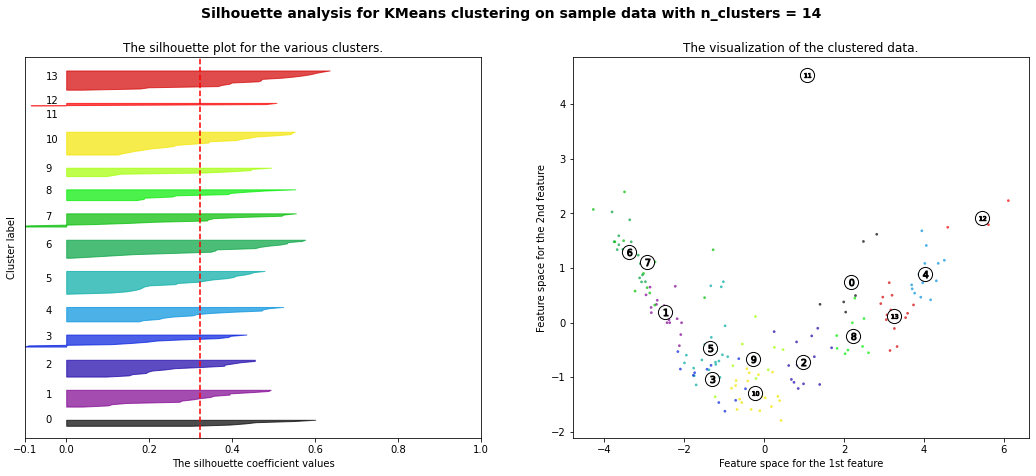

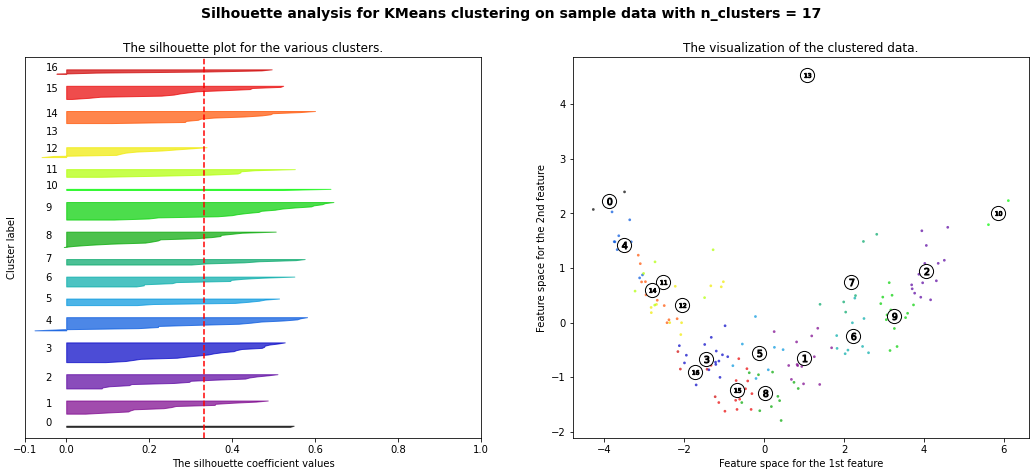

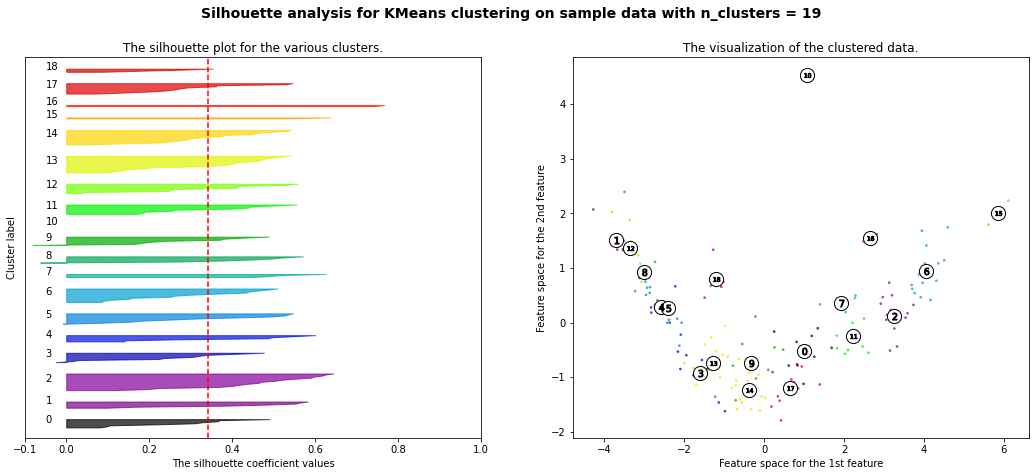

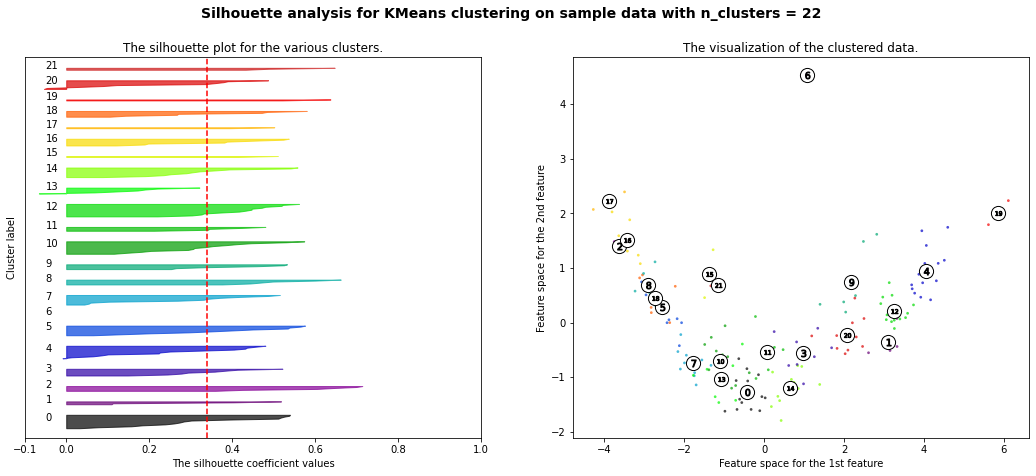

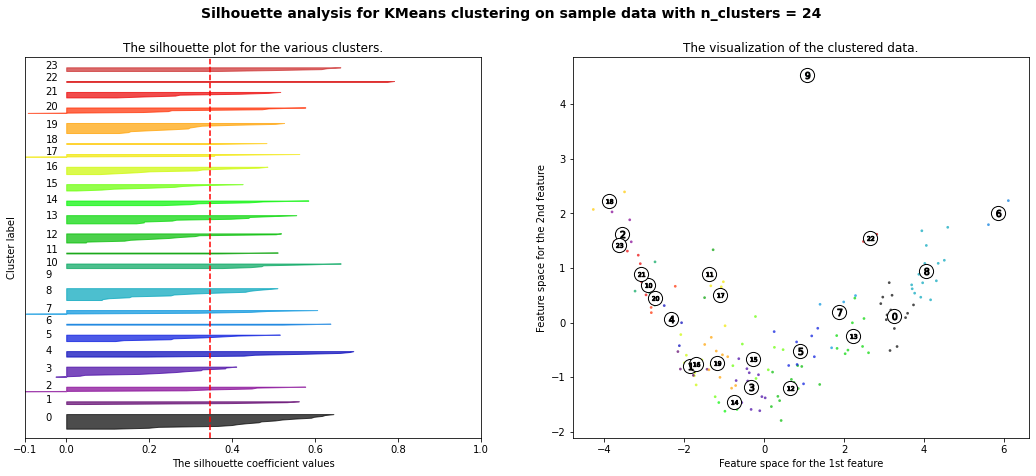

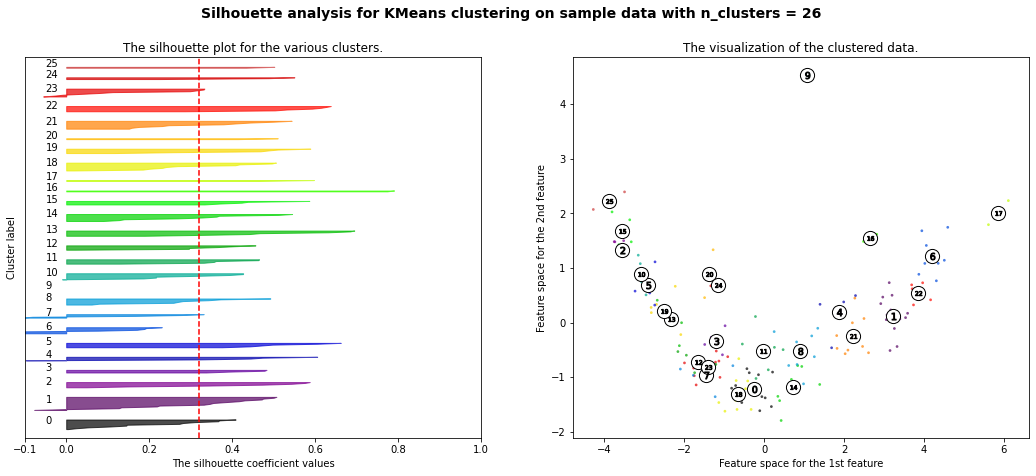

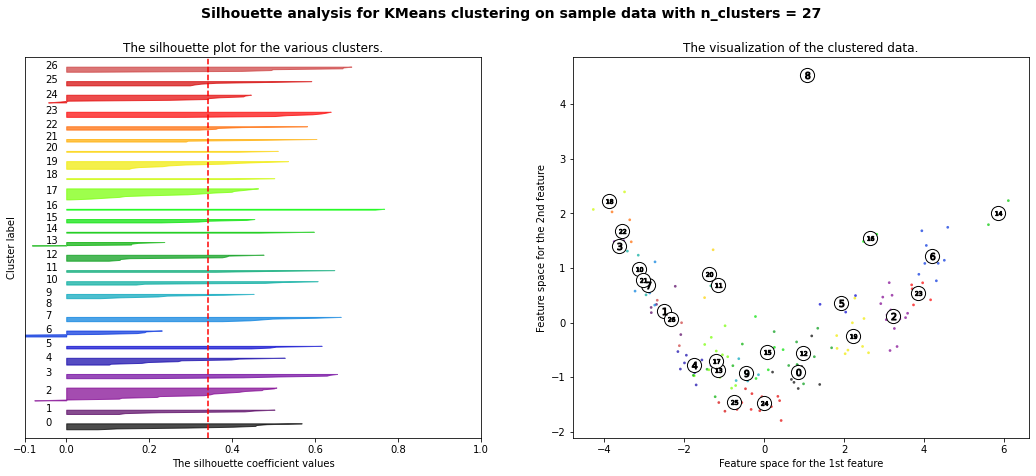

In [25]:
# visualizing the silhouette score scatter plots of cluster data
X=principal_Df
import matplotlib.cm as cm 

range_n_clusters = [2,3,4,6,8,10, 14,17, 19,22,24,26,27]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['principal component 1'],X['principal component 2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Model building--K_MEANS

### As we can see that clusters 2,3,4 gives better score and clustering but it's better to take 3 or 4 as no.of clusters

In [26]:
# for no.of clusters = 3
k_means = KMeans(n_clusters=3) 

k_means.fit(principal_Df)

KMeans(n_clusters=3)

In [27]:
# model parameter study
k_means.cluster_centers_

array([[-2.93743544,  0.85928455, -0.21063843],
       [ 3.13950623,  0.48738558, -0.01365217],
       [-0.51311945, -0.86518452,  0.13565785]])

In [28]:
# calculate model inertia

k_means.inertia_

344.4151750150595

In [29]:
k_means.labels_

array([0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [30]:
# 3D VISUALIZATION
import plotly.express as px
k_means = KMeans(n_clusters=3, max_iter = 300, init = 'k-means++',random_state = 0,n_init = 10)
fig = px.scatter_3d(principal_Df, x='principal component 1', y='principal component 2', z=y, color=k_means.fit_predict(principal_Df), opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 

In [31]:
# for no.of clusters=4
k_means4 = KMeans(n_clusters=4, max_iter = 600, n_init = 10, random_state=7)

k_means4.fit(principal_Df)

KMeans(max_iter=600, n_clusters=4, random_state=7)

In [32]:
k_means4.inertia_

288.61875201145807

In [33]:
# 3D visualization
k_means = KMeans(n_clusters=4, max_iter = 300, init = 'k-means++',random_state = 0,n_init = 10)
fig = px.scatter_3d(principal_Df, x='principal component 1', y='principal component 2', z=y, color=k_means.fit_predict(principal_Df), opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 

# Another way of doing cluster without scaling 

In [34]:
df_copy2=df_copy.copy()

In [35]:
df_copy.drop('country',axis=1,inplace=True)

In [36]:
# #standardising
# from sklearn.preprocessing import StandardScaler

# scaler= StandardScaler()

# df_co = scaler.fit_transform(df_copy)
# df_copy=pd.DataFrame(df_co,columns=df_copy.columns)

In [37]:
# treating outlies
for i in df_copy.columns:
    q1 , q3 =df_copy[i].quantile([0.25,0.75]) 
    iqr = q3-q1
    lf , uf = q1-1.5*iqr , q3+1.5*iqr
    df_copy[i] = np.where(df_copy[i] <lf ,lf,df_copy[i])
    df_copy[i] = np.where(df_copy[i] >uf ,uf,df_copy[i])

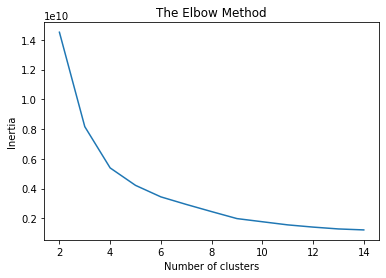

In [38]:
#plotting no.of clusters vs inertia
cs = []
for i in range(2,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 600, n_init = 10)
    
    kmeans.fit(df_copy)
    
    cs.append(kmeans.inertia_)

# plot the 
plt.plot(range(2,15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

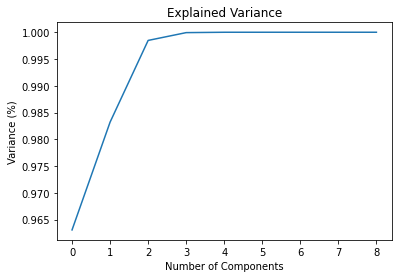

In [39]:
#finding no.of principal components required as per variance
pca = PCA()
principalComponents = pca.fit_transform(df_copy)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [40]:
# Applying PCA
pca = PCA(n_components=2)
new_data = pca.fit_transform(df_copy)
# This will be the new data fed to the algorithm.
principal_Df_copy = pd.DataFrame(data = new_data
             , columns = ['principal component 1','principal component 2'])

In [41]:
#finding silhouette score for each cluster
for i in range(2,10):
    k_means = KMeans(n_clusters=i, max_iter = 300, init = 'k-means++',random_state = 0,n_init = 10)
    cluster_labels=k_means.fit_predict(principal_Df_copy)
    print(silhouette_score(principal_Df_copy, cluster_labels))
#     plt.figure(figsize=(8,6),dpi=100)
#     print(sns.scatterplot(data=principal_Df_copy, x='principal component 1', y='principal component 2', 
#                           hue=cluster_labels, palette='viridis'))

0.7383742667195674
0.6143992722200847
0.5936450171498787
0.5410421329339019
0.52314229238436
0.5460890141959504
0.544919596751663
0.5392962185123671


For n_clusters = 2 The average silhouette_score is : 0.7383742667195674
For n_clusters = 3 The average silhouette_score is : 0.6146351449884063
For n_clusters = 4 The average silhouette_score is : 0.5936450171498787
For n_clusters = 10 The average silhouette_score is : 0.5230259898989342
For n_clusters = 14 The average silhouette_score is : 0.4713061496874165
For n_clusters = 17 The average silhouette_score is : 0.45349686077412715
For n_clusters = 19 The average silhouette_score is : 0.44127252616556173
For n_clusters = 22 The average silhouette_score is : 0.43595156069765395
For n_clusters = 24 The average silhouette_score is : 0.457222712116815
For n_clusters = 26 The average silhouette_score is : 0.4242099258078445
For n_clusters = 27 The average silhouette_score is : 0.4325897866330163


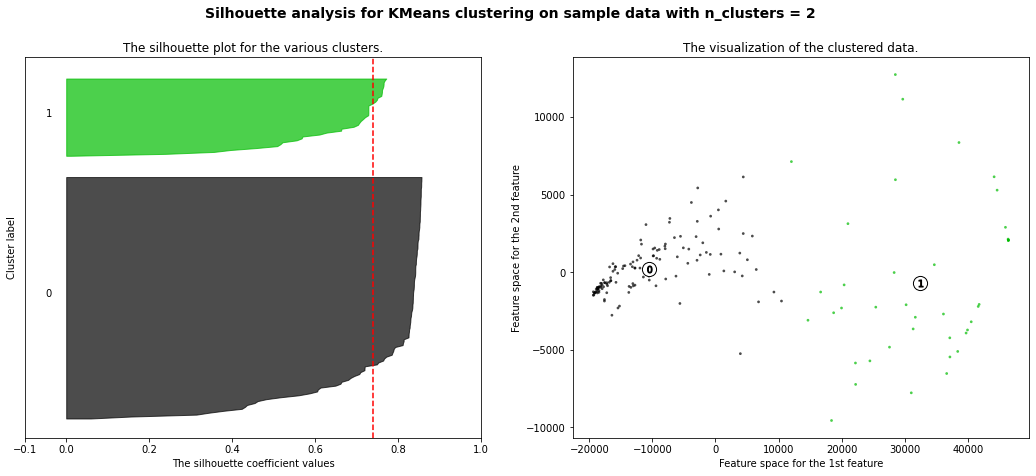

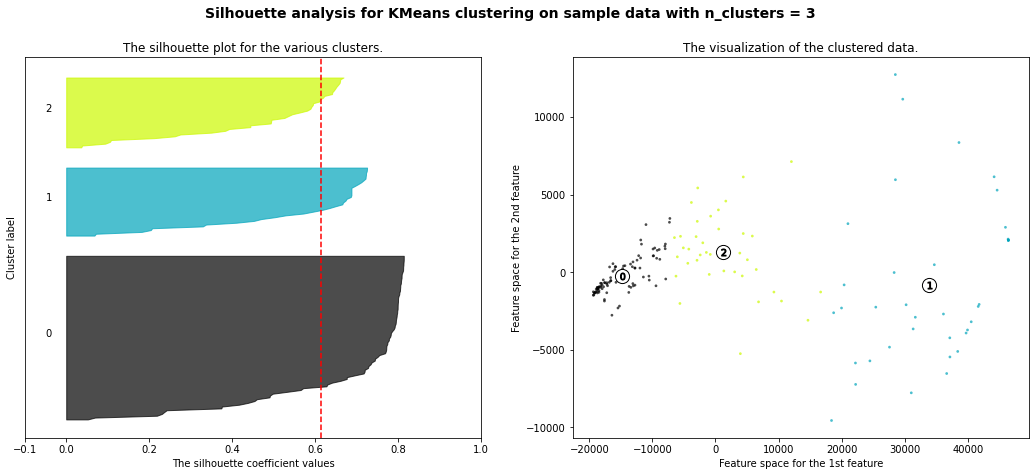

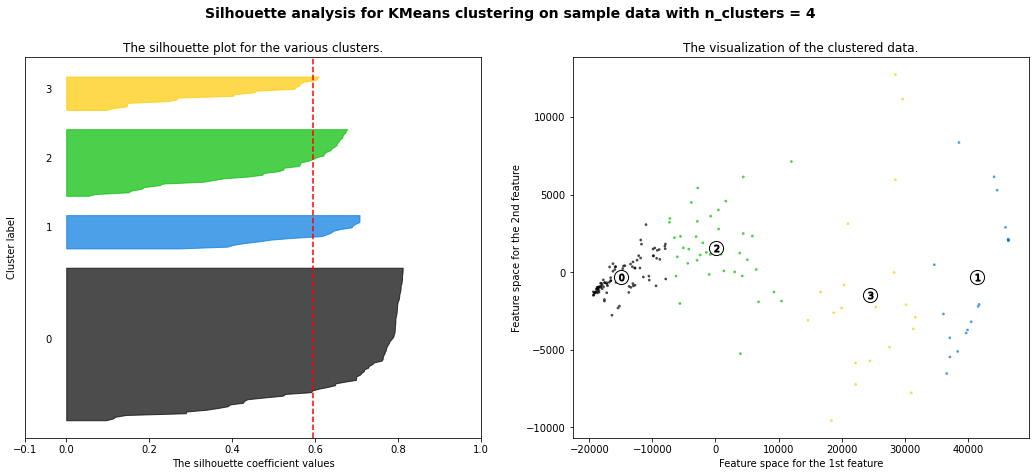

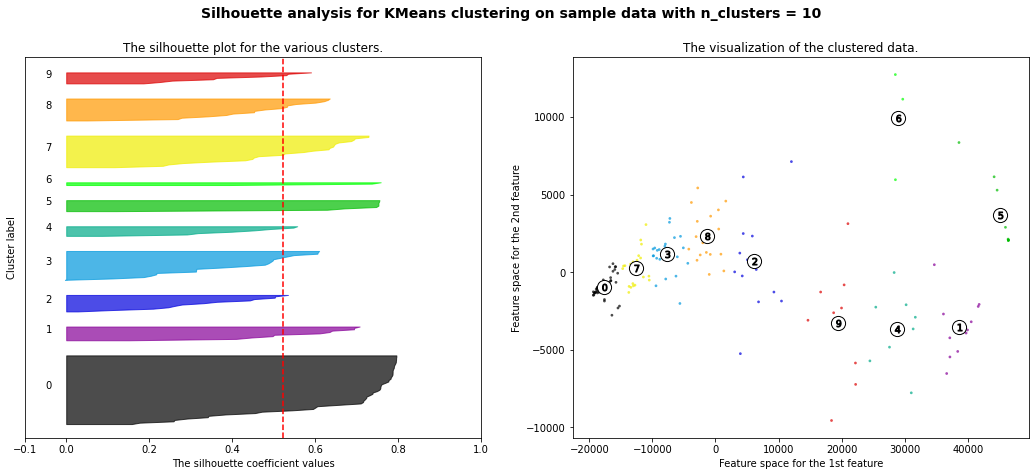

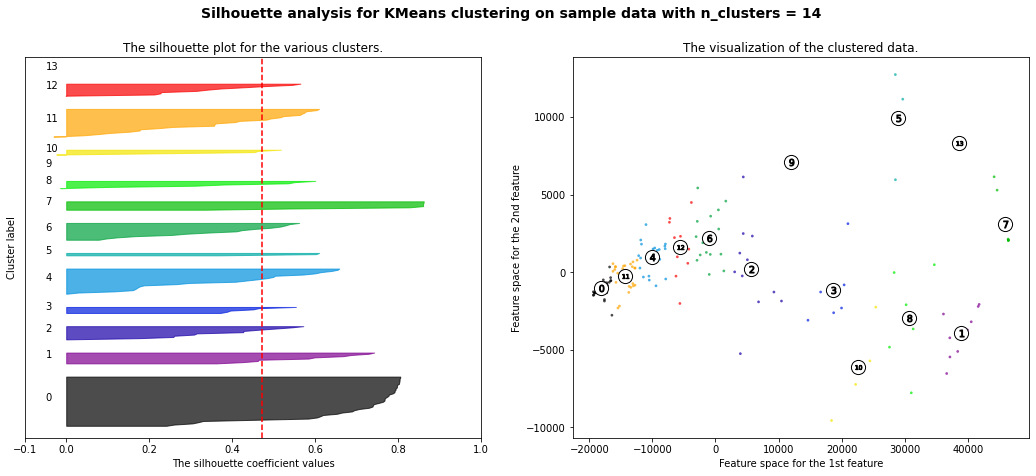

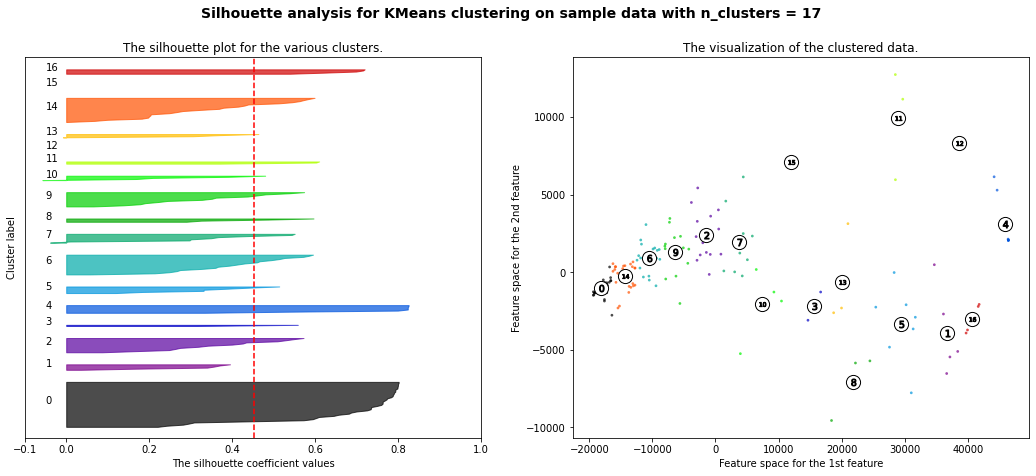

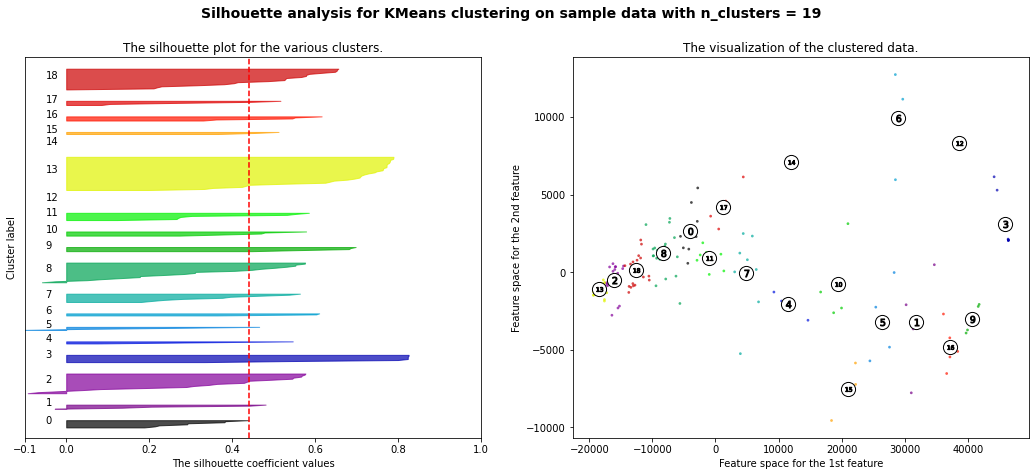

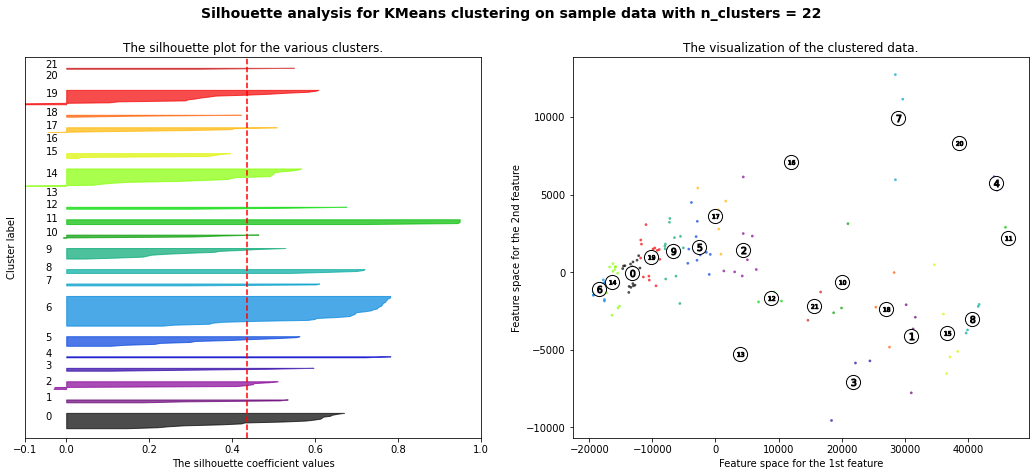

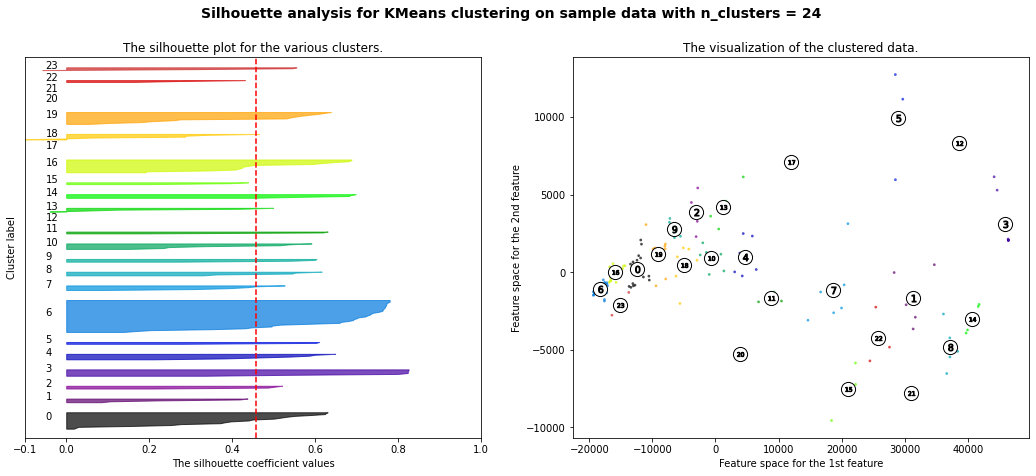

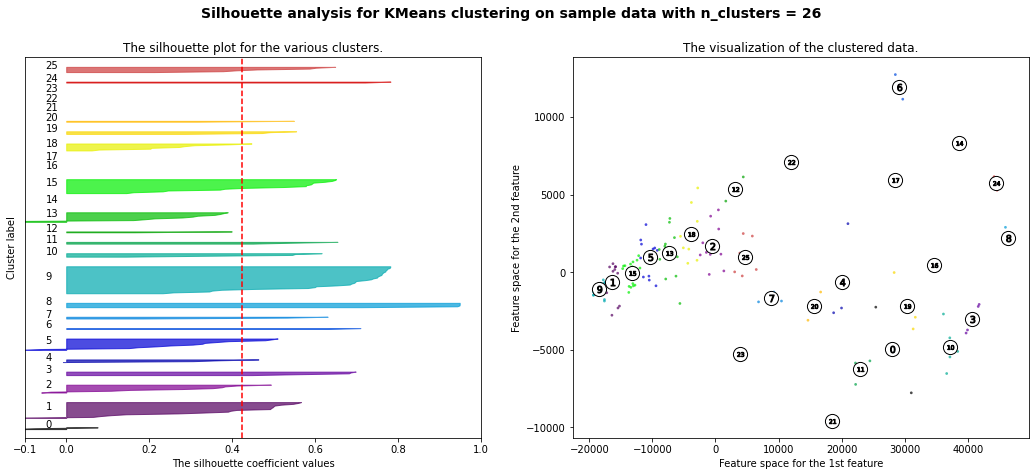

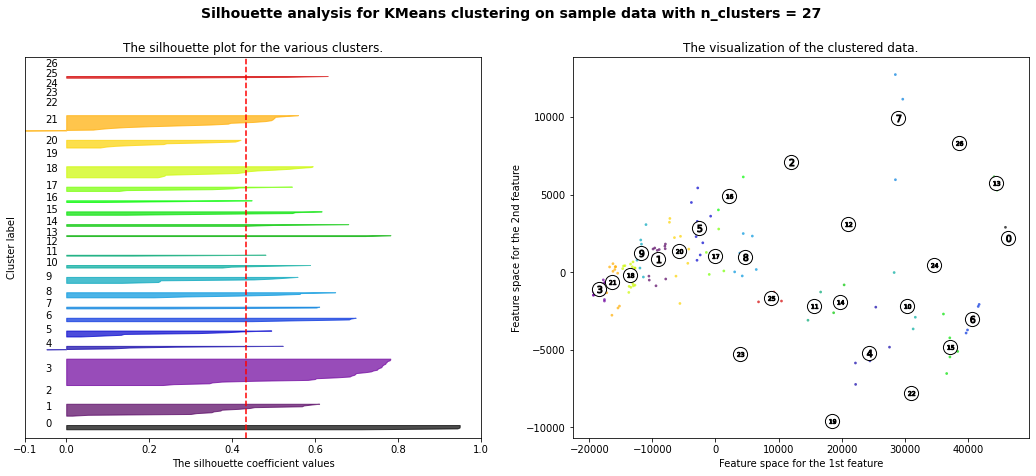

In [42]:
# visualizing the silhouette score scatter plots of cluster data
X=principal_Df_copy
import matplotlib.cm as cm 

range_n_clusters = [2,3,4, 10, 14,17, 19,22,24,26,27]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['principal component 1'],X['principal component 2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

As we can see that among all no.of clusters =3 will gives better results and clsutering and also score is improved to 61.5%

In [43]:
# for no.of clusters=3
k_means_copy = KMeans(n_clusters=3, max_iter = 600, n_init = 10, random_state=7)

k_means_copy.fit(principal_Df_copy)

KMeans(max_iter=600, n_clusters=3, random_state=7)

In [44]:
# 3D visualization
import plotly.express as px
k_means = KMeans(n_clusters=3, max_iter = 300, init = 'k-means++',random_state = 0,n_init = 10)
fig = px.scatter_3d(principal_Df_copy, x='principal component 1', y='principal component 2', z=y, color=k_means.fit_predict(principal_Df_copy), opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 

As per the results the clustering without scaling performs well with accuracy of 61% 

In [45]:
# concatinating the clustering labels with dataframe
country_df_clustered = df_copy2.iloc[:,:]
country_df_clustered = pd.concat([df_copy2, pd.DataFrame(k_means_copy.labels_, columns=['cluster_id_km'])], axis = 1)
# country_df_clustered = pd.concat([df_copy2, pd.DataFrame(k_means_copy_labels, columns=['cluster_id_hc'])], axis = 1)
country_df_clustered.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id_km  
0       9.44        56.2       5.82    553              1  
1       4.49        76.3       1.65   4090              1  
2      16.10        76.5       2.89   4460              1  
3      22.40        60.1       6.16   3530              1  
4       1.44        76.8       2.13  12200              2

In [46]:
# printing country names based on there cluster 
print("Cluster 0 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 0].country.unique())
print('\n')

print("Cluster 1 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 1].country.unique())
print('\n')


print("Cluster 2 of K_means Clustering model : ")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 2].country.unique())
print('\n')


Cluster 0 of K_means Clustering model : 
['Australia' 'Austria' 'Bahamas' 'Bahrain' 'Belgium' 'Brunei' 'Canada'
 'Cyprus' 'Czech Republic' 'Denmark' 'Equatorial Guinea' 'Finland'
 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Kuwait' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Qatar' 'Saudi Arabia' 'Singapore' 'Slovenia' 'South Korea' 'Spain'
 'Sweden' 'Switzerland' 'United Arab Emirates' 'United Kingdom'
 'United States']


Cluster 1 of K_means Clustering model : 
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Armenia' 'Bangladesh'
 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde'
 'Central African Republic' 'Chad' 'China' 'Colombia' 'Comoros'
 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire" 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Fiji' 'Gambia' 'Georgia'
 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India'
 'Indonesia' 